In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

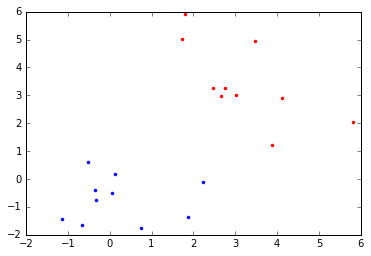

In [2]:
np.random.seed(9999)
xp = np.random.randn(10, 2)
xm = np.random.randn(10, 2) + [3, 3]
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
data = np.concatenate([xp, xm], axis=0)
classes = np.array([1]*10+[-1]*10)

1) What is an equation of line/plane? 

2) Explain geometrical interpretation of the two parameters

3) How do you determine whether a point $\vec{x}$ is one side of the line or another?

4) Given a line, is $\vec{w}$ and $b$ unique. (Are there two equation that represents the same line?)

5) Give another equation for the line represent by $\vec{w}=[1,2]$, $b=3$.

6) If we want $b$ in the previous equation to be 1. What should $\vec{w}$ be

In [ ]:
#minimize_with(w,b) 1/2 |w|^2
#subject to y*(w dot x + b) = 0

7) Draw a line defined by $\vec{w}=[2,3]$, $b=1$.

8) Draw a green point on the side where $\vec{w}\cdot\x + b > 0$ and a blue point on the other side.

9) What is a linearly separable data?

10) What is a margin?

11) How do we calculate the margin? And with that formula what kind of normalization are we using?

12) What are we trying to optimize? What are our contraint?

13) Can we use gradient descent with constrained optimization? Why?

14) Given these data points find the line of maximum margin. Draw it along with data points.

Use numpy.optimize.minimize with method = SLSQP

Read the doc here.
http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize

In [4]:
#Example

def f(x):
    a, b = x
    return (a-1)**2 + (b-2)**2

# minimize f(x)
# subject to: x -----> (a, b)
# a - 5 >= 0
# b - 4 >= 0

def constraints(x):
    a, b = x
    return [a-5, b-4]

cons = ({'type': 'ineq',
         'fun' : constraints})

minimize(f, [10., 10.], method="SLSQP", constraints=cons)

  status: 0
 success: True
    njev: 2
    nfev: 8
     fun: 19.999999999988923
       x: array([ 5.,  4.])
 message: 'Optimization terminated successfully.'
     jac: array([ 8.,  4.,  0.])
     nit: 2

  status: 0
 success: True
    njev: 5
    nfev: 25
     fun: 0.88345210488050663
       x: array([ 2.55905484, -0.7316033 , -0.59009212])
 message: 'Optimization terminated successfully.'
     jac: array([ 0.        , -1.46320659, -1.18018422,  0.        ])
     nit: 5


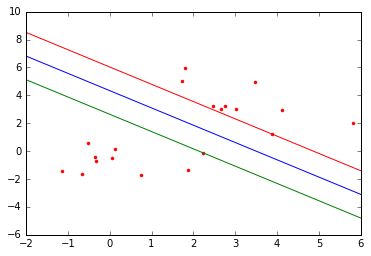

In [3]:
def cost(ws):
    b = ws[0]
    w = ws[1:]
    return np.linalg.norm(w)**2


def constraints(ws):
    b = ws[0]
    w = ws[1:]
    #print classes*(np.dot(data, w) + b) - 1
    return classes*(np.dot(data, w) + b) - 1

cons = ({'type': 'ineq',
         'fun' : constraints})

res = minimize(cost, [1., 2., 3.], method="SLSQP", constraints=cons)

print res 
b = res.x[0]
w = res.x[1:]
m = -w[0]/w[1]
c = -b/w[1]

xs = np.linspace(-2, 6, 100)
ys = m*xs + c
plt.plot(data[:, 0], data[:, 1], '.r')
plt.plot(xs, ys)

m = -w[0]/w[1]
cl = -(b-1)/w[1]
xs = np.linspace(-2, 6, 100)
yls = m*xs + cl
plt.plot(xs,yls)

m = -w[0]/w[1]
cr = -(b+1)/w[1]
xs = np.linspace(-2, 6, 100)
yrs = m*xs + cr
plt.plot(xs,yrs)

15) What is a slack variable?

16) How do we penalize the slack variable.

17) Plot soft margin cost function along with logistic cost.

18) How can we view our new and penalized cost function as a regularization?

19) Try your new cost function with these data points.

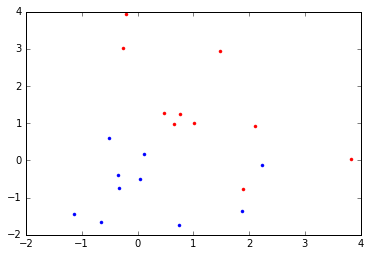

In [12]:
np.random.seed(9999)
xp = np.random.randn(10, 2)
xm = np.random.randn(10, 2) + [1, 1]
plt.plot(xp[:, 0], xp[:,1], '.b')
plt.plot(xm[:, 0], xm[:,1], '.r')
data = np.concatenate([xp, xm], axis=0)
classes = np.array([1]*10+[-1]*10)

20) What if we want a curved line? Draw contour plot.

[-1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1  1  1 -1 -1 -1]


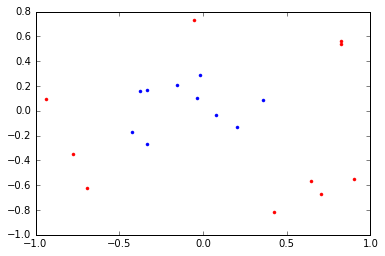

In [24]:
np.random.seed(9999)
data = np.random.random((20,2))*2-1
def is_pos(x):
    return 1 if np.linalg.norm(x-[0.1,0.1])<0.6 else -1
classes = np.array([is_pos(x) for x in data])
print classes
plt.plot(data[classes==1,0], data[classes==1,1], '.b')
plt.plot(data[classes==-1,0], data[classes==-1,1], '.r')

21) What are the support vectors?